In [29]:
import pandas as pd
import numpy as np
import biogeo
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmocean
import cbsyst as cb
import xarray as xr
import scipy.optimize.nnls as scinnls
import gsw

In [51]:
skiprows = list(range(0,34)) + [35]
df = pd.read_csv('/Users/Sean/Downloads/a22_2003a_hy1.csv',skiprows=skiprows,sep=',',na_values=-999)
# skiprows = list(range(0,149)) + [150]
# df = pd.read_csv('/Users/Sean/Downloads/33RO20161119_hy1.csv',skiprows=skiprows,sep=',',na_values=-999)

lat = df['LATITUDE']
lon = df['LONGITUDE']

# theta = pd.Series(gsw.pt_from_t(df['SALNTY'],df['CTDTMP'],df['CTDPRS'],0))
# theta.name = 'THETA'
theta = df['THETA']
S = df['SALNTY']
N = df['NITRAT']
P = df['PHSPHT']
O = df['OXYGEN']
DIC = df['TCARBN']
Alk = df['ALKALI']
depth = df['CTDPRS']
Si = df['SILCAT']

(-75, -63)

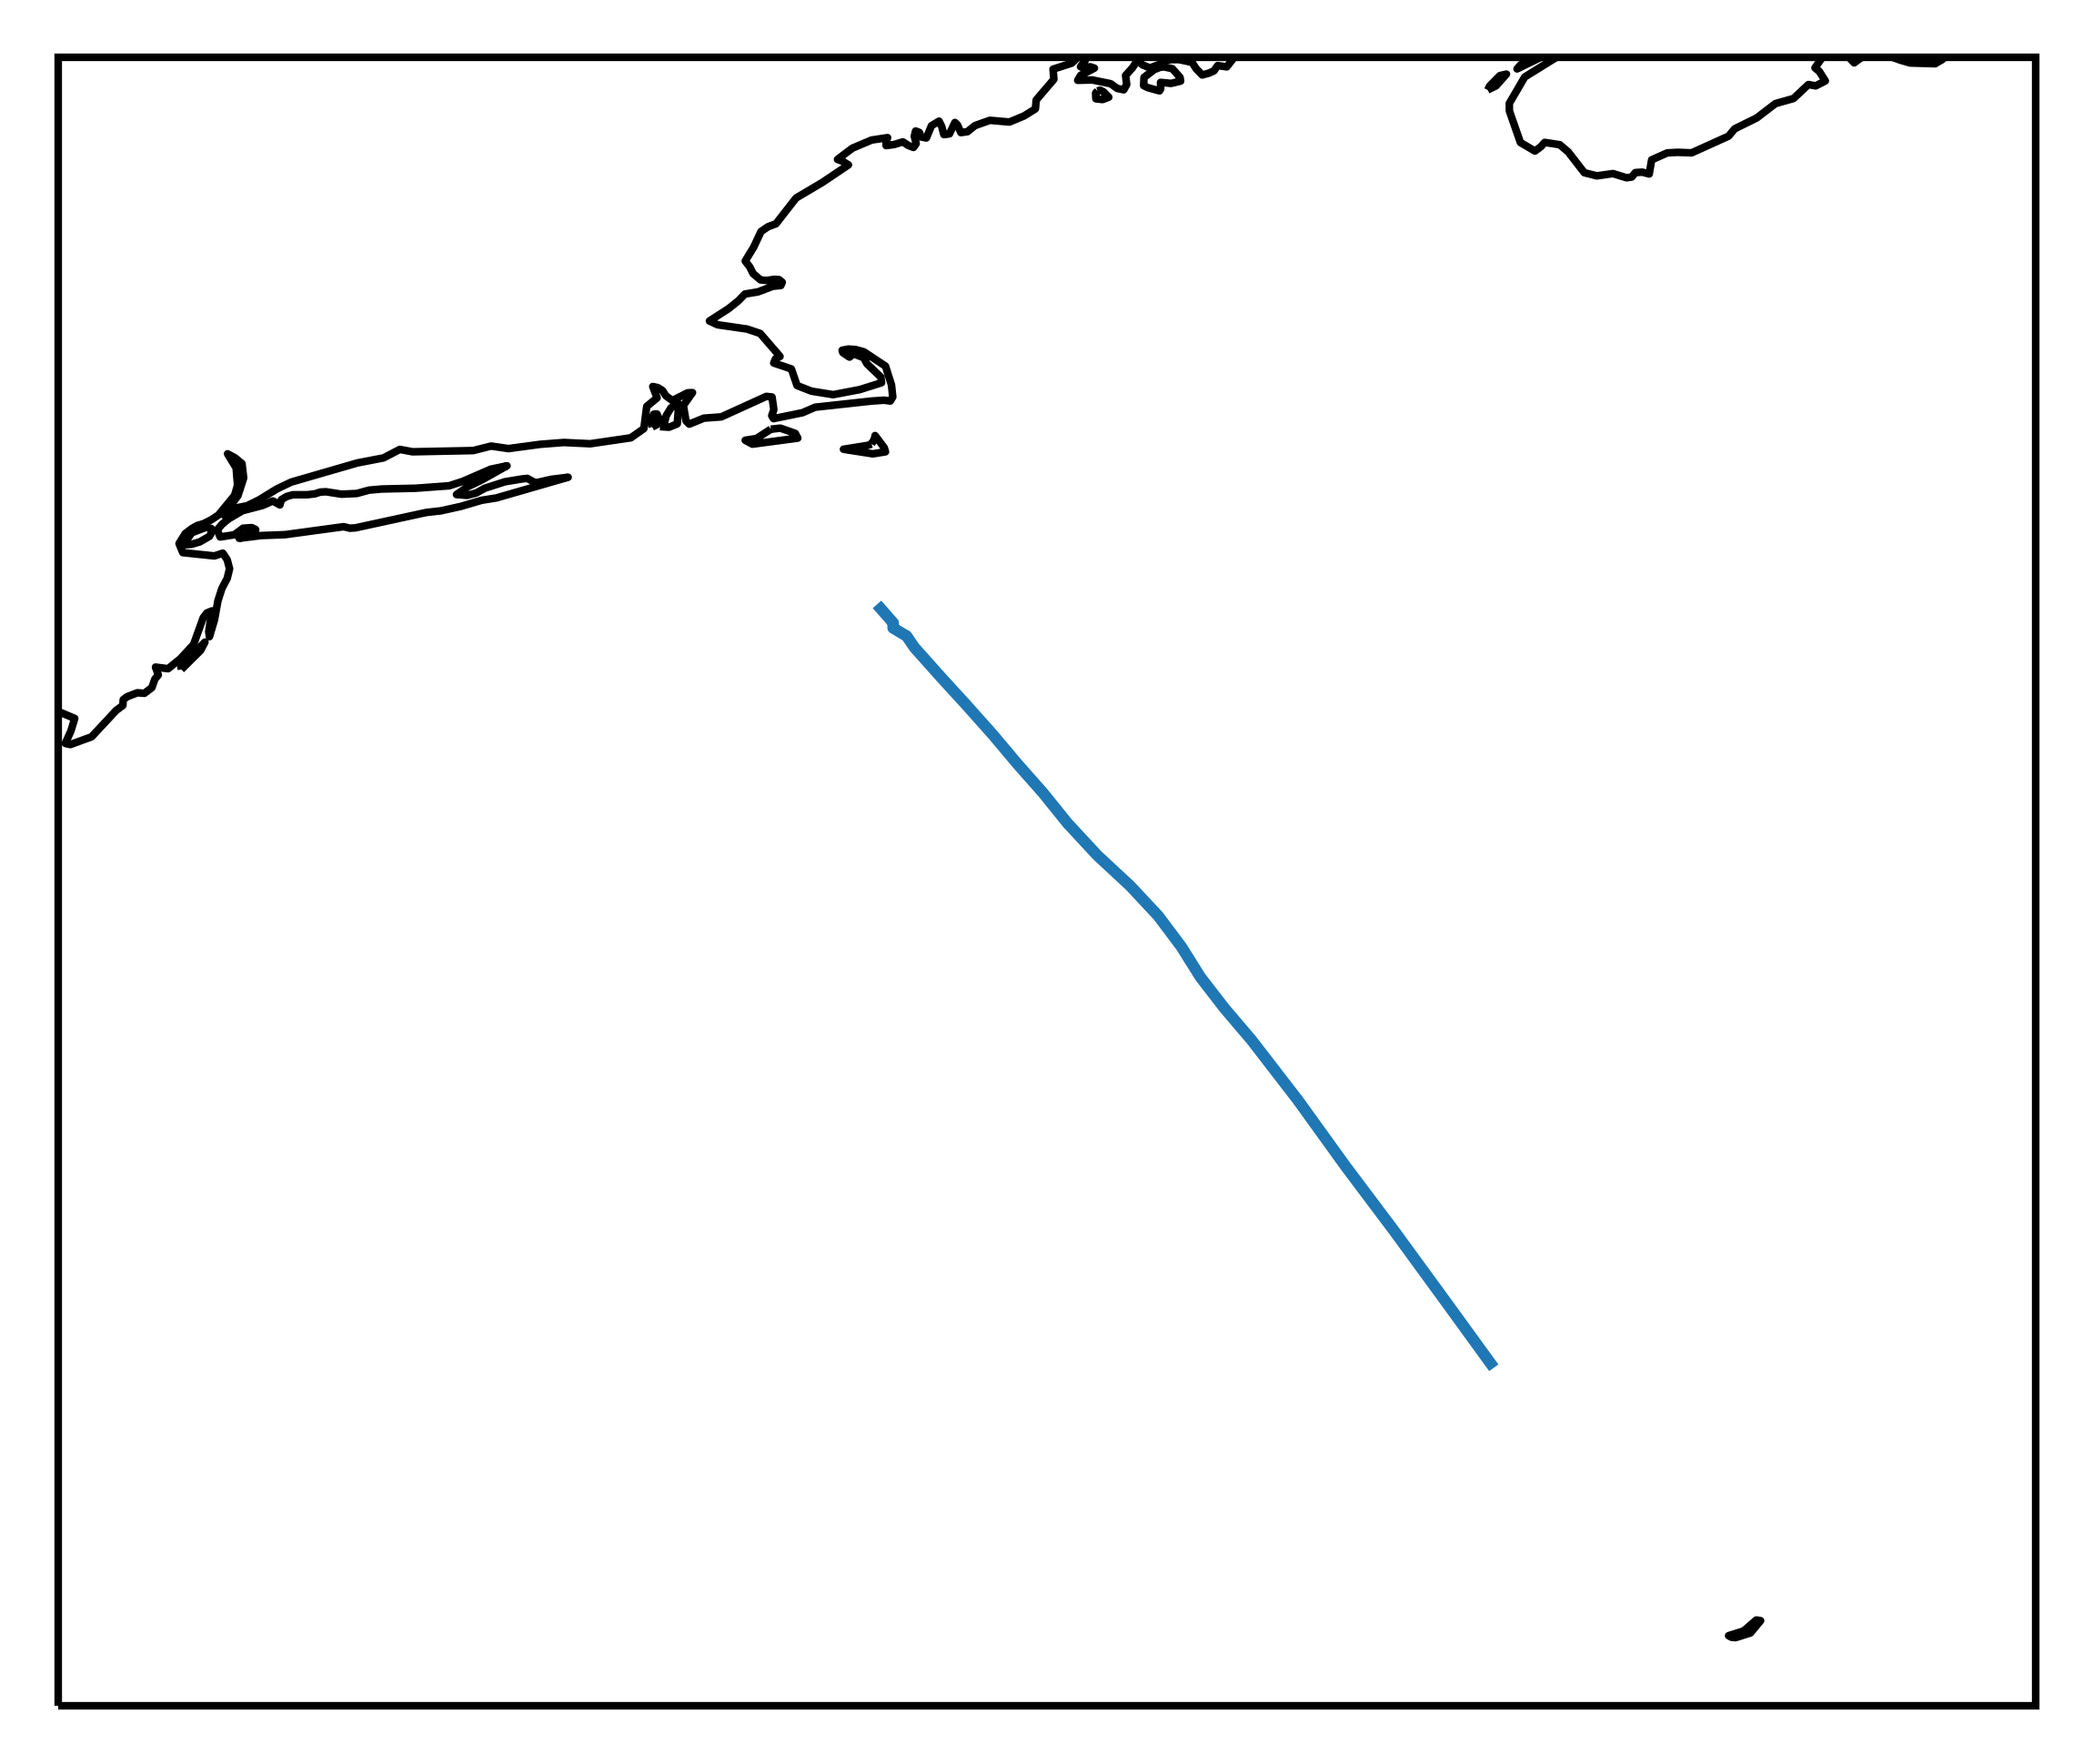

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure(dpi=600)

ax = plt.axes(projection=ccrs.LambertCylindrical())

ax.coastlines(resolution='50m')

plt.plot(df['LONGITUDE'][df['LONGITUDE']<-66.1],df['LATITUDE'][df['LONGITUDE']<-66.1], transform=ccrs.PlateCarree())

ax.set_ylim(30,40)
ax.set_xlim(-75,-63)

(2000, 0)

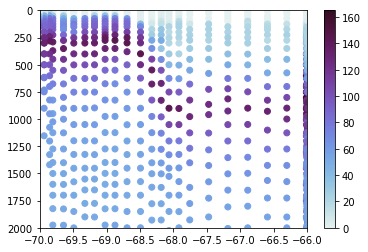

In [52]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c= biogeo.aou(O,theta,S)
                  ,cmap=cmocean.cm.dense,vmin = 0,vmax = 165)

plt.colorbar(cax)
plt.xlim(-70,-66)
plt.ylim(2000,0)

In [53]:
Cant = biogeo.phiCT(theta,S,Si,O,N,P,Alk,DIC)

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cbsyst/carbon_fns.py:113: RuntimeWarning: invalid value encountered in greater
  while any(abs(deltapH) > 1):
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cbsyst/carbon_fns.py:93: RuntimeWarning: invalid value encountered in greater
  while any(abs(deltapH) > pHtol):


(2000, 0)

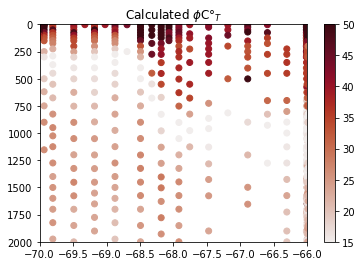

In [54]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = Cant
                  ,cmap = cmocean.cm.amp,vmin = 15,vmax = 50)
                  
plt.colorbar(cax)

plt.title('Calculated $\phi$C$\degree_T$')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

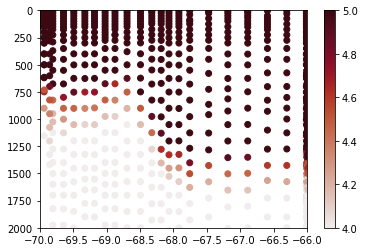

In [7]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c=theta
                  ,cmap=cmocean.cm.amp,vmin = 4,vmax = 5)
plt.colorbar(cax)

plt.xlim(-70,-66)
plt.ylim(2000,0)

In [8]:
AOU = biogeo.aou(O,theta,S)
Alk_pre_eomp,dc_dis_eomp = biogeo.eOMP(theta,S,Si,O,N,P,AOU)

DIC_pre = biogeo.DIC_pre(DIC,Alk,N,O,P,Si,S,theta,AOU)
Alk_pre = biogeo.Alk_pre(N,O,P,Si,S,theta,AOU,Alk_pre_eomp)

Text(0.5,1,'N$^*$ (Nitrogen Fixation)')

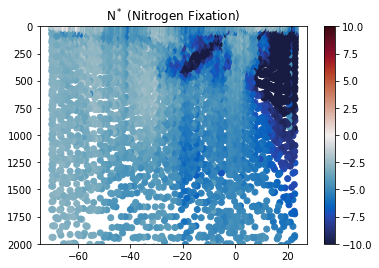

In [50]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c= biogeo.Nstar(N,P)
                  ,cmap=cmocean.cm.balance,vmin = -1.5,vmax = 1.5)

plt.colorbar(cax)
plt.xlim(-70,-66)
plt.ylim(2000,0)
plt.title('N$^*$ (Nitrogen Fixation)')

(2000, 0)

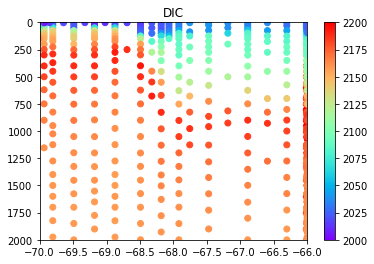

In [21]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = DIC
                  ,cmap=plt.get_cmap('rainbow'),vmin = 2000,vmax = 2200)
#                   ,cmap = cmocean.cm.turbid,vmin = 2000,vmax = 2130)
                  
plt.colorbar(cax)

plt.title('DIC')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

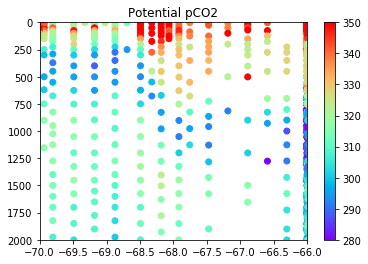

In [11]:
out = cb.Csys(DIC=DIC_pre,TA=Alk_pre,T=theta,S=S)
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = out.pCO2
                  ,cmap=plt.get_cmap('rainbow'),vmin = 280,vmax = 350)

plt.colorbar(cax)

plt.title('Potential pCO2')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

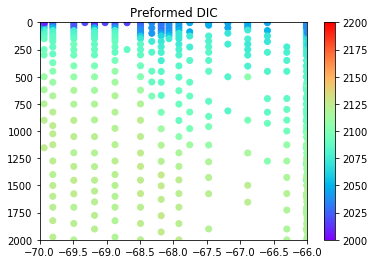

In [22]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = DIC_pre
                  ,cmap=plt.get_cmap('rainbow'),vmin = 2000,vmax = 2200)
#                   ,cmap = cmocean.cm.turbid,vmin = 2000,vmax = 2130)
                  
plt.colorbar(cax)

plt.title('Preformed DIC')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

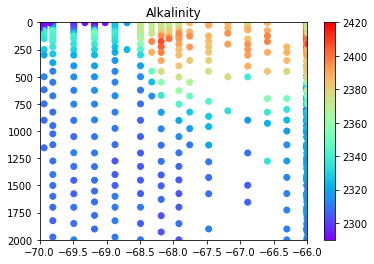

In [13]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = Alk
                  ,cmap=plt.get_cmap('rainbow'),vmin = 2290,vmax = 2420)
#                   ,cmap = cmocean.cm.turbid,vmin = 2000,vmax = 2130)
                  
plt.colorbar(cax)

plt.title('Alkalinity')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

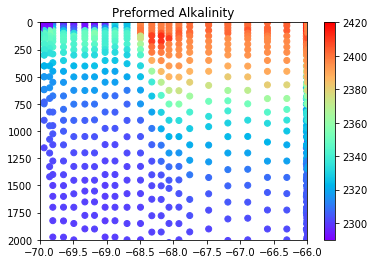

In [14]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c = Alk_pre
                  ,cmap=plt.get_cmap('rainbow'),vmin = 2290,vmax = 2420)
#                   ,cmap = cmocean.cm.turbid,vmin = 2290,vmax = 2420)
                  
plt.colorbar(cax)

plt.title('Preformed Alkalinity')
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

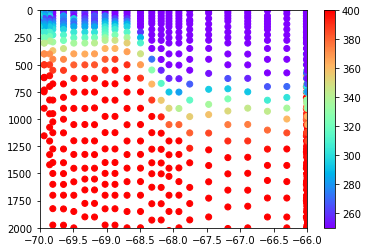

In [15]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c=biogeo.PO(P,O)
#                   ,cmap=cmocean.cm.matter,vmin = 290,vmax = 380)
                  ,cmap=plt.get_cmap('rainbow'),vmin = 250,vmax = 400)

plt.colorbar(cax)
plt.xlim(-70,-66)
plt.ylim(2000,0)

(2000, 0)

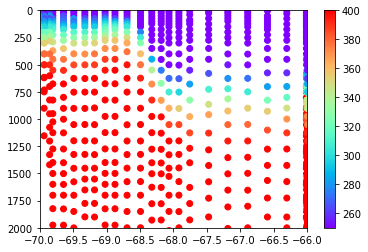

In [16]:
cax = plt.scatter(df['LONGITUDE']
                  ,df['CTDPRS']
                  ,c=biogeo.NO(N,O)
#                   ,cmap=cmocean.cm.matter,vmin = 290,vmax = 380)
                  ,cmap=plt.get_cmap('rainbow'),vmin = 250,vmax = 400)

plt.colorbar(cax)
plt.xlim(-70,-66)
plt.ylim(2000,0)